In [3]:
from scipy import *
import numpy as np
%matplotlib inline

In [108]:
######### Calderone 2017 model, follows Grandi (1982) and Dietrich et al. (2002) 
######### http://adsabs.harvard.edu/abs/2017MNRAS.472.4051C

Te = 15000.0
tauBE = 1.0
A0 = 0.1
lBE = 3645.0*1e-10 ### edge wavelength in unit m
h = 6.626e-34
c = 3.0e+8
kB = 1.38e-23

##### SI unit
Bl = lambda Te, l: (2.0*pi*h*c**2)/(l**5*exp(h*c/(l*kB*Te)-1.0))

/Users/jia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: overflow encountered in exp


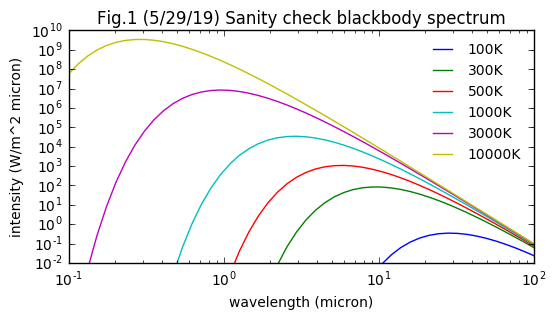

In [121]:
#l_arr = linspace(1000,10000, 1001)*1e-10 ## in unit m
l_arr = logspace(3,6)*1e-10
f,ax=subplots(1,1, figsize=(6,3))
#ax.plot(l_arr*1e10, Bl(3000, l_arr))
for iT in (100,300, 500, 1000, 3000, 10000):
    ax.plot(l_arr*1e6, Bl(iT, l_arr)*1e-6,label='%sK'%(iT))
#ax.plot(l_arr*1e10, Ll(A0, l_arr, Te))

ax.set_yscale('log'), ax.set_xscale('log')
ax.set_ylim(0.01, 1e10)
ax.legend(fontsize=10,frameon=0)
ax.set_xlabel('wavelength (micron)')
ax.set_ylabel('intensity (W/m^2 micron)')
ax.set_title('Fig.1 (5/29/19) Sanity check blackbody spectrum')

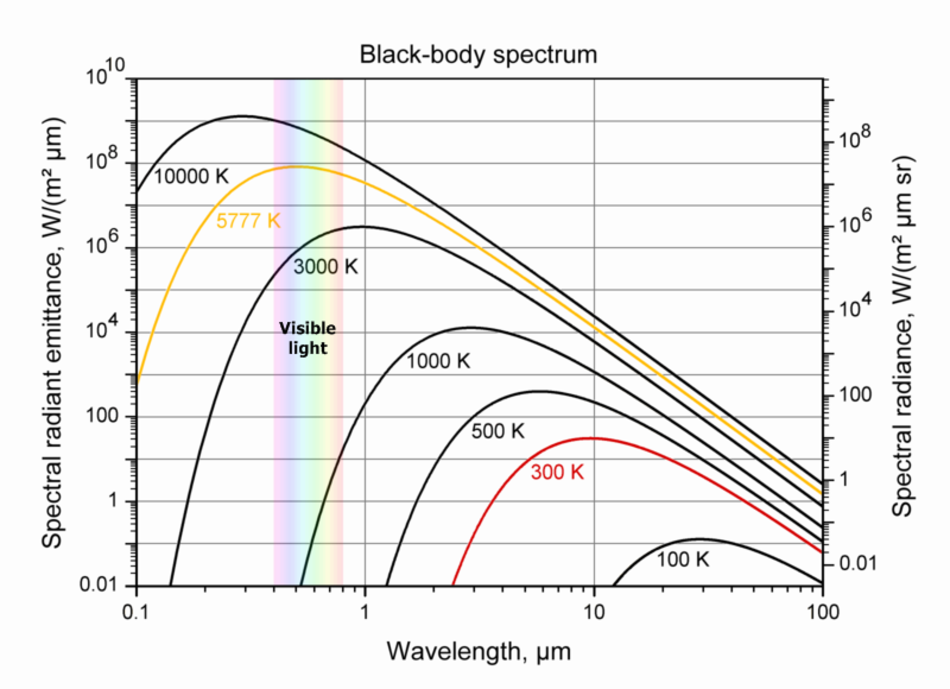

In [110]:
## http://www.sun.org/uploads/images/mainimage_BlackbodySpectrum_2.png
from IPython.display import Image
Image("http://www.sun.org/uploads/images/mainimage_BlackbodySpectrum_2.png", width=400)

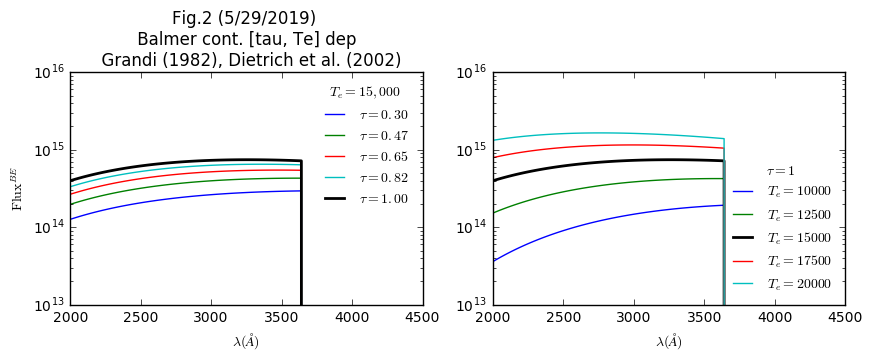

In [147]:
Ll0 = lambda A, l, Te, tauBE: A * Bl(Te, l)*(1.0-exp(-tauBE*(l/lBE)**3)) ## Nina
#Ll = lambda A, l, Te, tauBE: A * Bl(Te, l)*(1.0-exp(tauBE*(l/lBE)**3-1)) ## my correction
#Ll = lambda A, l, Te, tauBE: Bl(Te, l)*(1.0-exp(-tauBE)) ## Wills1985
def Ll(A, l, Te, tauBE):
    out=Ll0(A, l, Te, tauBE)
    out[l>lBE]=0
    return out

Te=15000.0
l_arr = linspace(2000, 4000,101)*1e-10 #### in unit of m
f,(ax1,ax2)=subplots(1,2, figsize=(10,3))
for itauBE in linspace(0.3,1,5):
    if itauBE==1: ax1.plot(l_arr*1e10, Ll(A0, l_arr, Te, itauBE),'k-',lw=2, label=r'$\tau=%.2f$'%(itauBE))
    else: ax1.plot(l_arr*1e10, Ll(A0, l_arr, Te, itauBE),label=r'$\tau=%.2f$'%(itauBE))
for iTe in linspace(10000,20000,5):
    if iTe==15000:ax2.plot(l_arr*1e10, Ll(A0, l_arr, iTe, tauBE),'k-',lw=2,label=r'$T_e=%i$'%(iTe))
    else: ax2.plot(l_arr*1e10, Ll(A0, l_arr, iTe, tauBE),label=r'$T_e=%i$'%(iTe))

ax1.set_yscale('log')
ax1.legend(fontsize=10,frameon=0,loc=0,ncol=1,title=r'$T_e=15,000$')
ax2.set_yscale('log')
ax2.legend(fontsize=10,frameon=0,loc=0,ncol=1,title=r'$\tau=1$')
ax1.set_xlabel('$\lambda (\AA)$');ax2.set_xlabel('$\lambda (\AA)$')
ax1.set_ylabel(r'${\rm Flux}^{BE}$')
ax1.set_ylim(1e13, 1e16); ax2.set_ylim(1e13, 1e16)
ax1.set_title('Fig.2 (5/29/2019) \n Balmer cont. [tau, Te] dep \n  Grandi (1982), Dietrich et al. (2002)')
#plt.tight_layout()